# Setup

In [ ]:
!pip install wordcloud
!pip install demoji

     |████████████████████████████████| 42 kB 1.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import uniform

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords

import re
import demoji

import matplotlib.pyplot as plt
#from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV

# models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Training ML models using the pre-labelled dataset

## Import clean pre-labelled dataset

In [ ]:
df_labelled = pd.read_csv('/content/drive/My Drive/Data Cleaning/cleaned_labelled_tweets_with_tokens.csv')

In [ ]:
df_labelled.head(5)

,Tweet,sentiments,cleaned_tweets,tokens
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"['inspiration', 'aspect', 'fashion']"
1,fitness,1,fitness,['fitness']
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"['beauty', 'personality', 'kiss', 'thefashioni..."
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"['apka', 'apna', 'awam', 'ka', 'channel', 'fra..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"['beautiful', 'album', 'greatest', 'unsung', '..."


In [ ]:
X = df_labelled["tokens"].astype(str)
Y = df_labelled["sentiments"]
print(X,Y)

0                    ['inspiration', 'aspect', 'fashion']
1                                             ['fitness']
2       ['beauty', 'personality', 'kiss', 'thefashioni...
3       ['apka', 'apna', 'awam', 'ka', 'channel', 'fra...
4       ['beautiful', 'album', 'greatest', 'unsung', '...
                              ...                        
3827             ['idfc', 'official', 'vikram', 'limaye']
3828    ['former', 'captain', 'diana', 'edulji', 'othe...
3829    ['supreme', 'court', 'name', 'former', 'cag', ...
3830    ['court', 'summons', 'cm', 'suspended', 'bjp',...
3831    ['amulya', 'patnaik', 'ha', 'appointed', 'new'...
Name: tokens, Length: 3832, dtype: object 0       1
1       1
2       1
3       1
4       1
       ..
3827    0
3828    0
3829    0
3830    0
3831    0
Name: sentiments, Length: 3832, dtype: int64


In [ ]:
# no class imbalance
df_labelled.sentiments.value_counts()

 0    1541
 1    1182
-1    1109
Name: sentiments, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Split train, validation, test (80-10-10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=18)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=18)

In [ ]:
X_train

1955                         ['definitely', 'arm', 'unhappy']
1767       ['please', 'reading', 'break', 'heart', 'unhappy']
1202      ['can', 'people', 'do', 'stuff', 'like', 'unhappy']
2838                           ['join', 'already', 'assault']
3218                                        ['menu', 'judge']
                                ...                          
2481                                   ['activist', 'killed']
2899                     ['tutor', 'kid', 'roped', 'harvest']
1824                         ['definitely', 'arm', 'unhappy']
954     ['inspiration', 'everyone', 'miss', 'jones', 'happy']
3341                           ['say', 'prasun', 'chaudhuri']
Name: tokens, Length: 3103, dtype: object

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3103,)
(345,)
(384,)


## Vectorise the tokens using tfidf vectoriser

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
len(tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5022

In [ ]:
# tfidf vector 
# TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words.
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)
X_val_tfidf = tfidf_vect.transform(X_val)

## Training ML models

- SVM 
- Neural Networks
- Naive Bayes 
- Logistic Regression


### Helper Functions

***Model Results Template***

Summary:

Default 
- train: 
- val: 

Tuned
- train: 
- val: 

In [ ]:
agg_accuracy_score_dict = {}
train_accuracy_score_dict = {}
val_accuracy_score_dict = {}
test_accuracy_score_dict = {}

def evaluation(true, pred, title):
    print("================== Evaluation on {} ==================".format(title))
    # accuracy 
    acc = accuracy_score(true, pred)
    print("accuracy: {}\n".format(acc))
    agg_accuracy_score_dict[title] = acc
    print("classification report: \n{}\n".format(classification_report(true, pred)))
    print("================== End of Evaluation on {} ==================".format(title))
    
    if "train dataset" in title:
        train_accuracy_score_dict[title] = acc
    elif "test dataset" in title:
        test_accuracy_score_dict[title] = acc
    else:
        val_accuracy_score_dict[title] = acc

### SVM
Summary:

Default (overfit)
- train: 0.9948453608247423
- val: 0.9130434782608695

Tuned
- train: 0.9455541237113402 
- val: 0.9101449275362319

#### Default

In [ ]:
svc = SVC(random_state= 18).fit(X_train_tfidf, y_train)

In [ ]:
y_train_svm_predict = svc.predict(X_train_tfidf)
evaluation(y_train, y_train_svm_predict, "Default SVM on train dataset")

================== Evaluation on Default SVM on train dataset ==================
accuracy: 0.9945214308733483

classification report: 
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       911
           0       0.99      1.00      1.00      1228
           1       0.99      1.00      0.99       964

    accuracy                           0.99      3103
   macro avg       0.99      0.99      0.99      3103
weighted avg       0.99      0.99      0.99      3103


================== End of Evaluation on Default SVM on train dataset ==================


In [ ]:
y_val_svm_predict = svc.predict(X_val_tfidf)
evaluation(y_val, y_val_svm_predict, "Default SVM on validation dataset")

================== Evaluation on Default SVM on validation dataset ==================
accuracy: 0.9072463768115943

classification report: 
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91        88
           0       0.87      0.97      0.92       158
           1       0.96      0.82      0.89        99

    accuracy                           0.91       345
   macro avg       0.92      0.89      0.90       345
weighted avg       0.91      0.91      0.91       345


================== End of Evaluation on Default SVM on validation dataset ==================


#### Tuning

In [ ]:
svc = SVC(random_state= 18)
parameters = {"C":uniform(), "kernel":["linear", "polynomial", "rbf", "sigmoid"]}
svm_model = RandomizedSearchCV(svc, parameters, random_state=18, cv = 3)
searched_svm_model = svm_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 342, in _sparse_fit
    kernel_type = self._sparse_kernels.index(kernel)
ValueError: 'po

In [ ]:
searched_svm_model.best_params_ 

{'C': 0.7361746251160107, 'kernel': 'sigmoid'}

In [ ]:
y_train_svm_predict = searched_svm_model.predict(X_train_tfidf)
evaluation(y_train, y_train_svm_predict, "Tuned SVM on train dataset")

================== Evaluation on Tuned SVM on train dataset ==================
accuracy: 0.9220109571382533

classification report: 
              precision    recall  f1-score   support

          -1       0.99      0.86      0.92       911
           0       0.87      1.00      0.93      1228
           1       0.95      0.88      0.91       964

    accuracy                           0.92      3103
   macro avg       0.93      0.91      0.92      3103
weighted avg       0.93      0.92      0.92      3103


================== End of Evaluation on Tuned SVM on train dataset ==================


In [ ]:
y_val_svm_predict = searched_svm_model.predict(X_val_tfidf)
evaluation(y_val, y_val_svm_predict, "Tuned SVM on validation dataset")

================== Evaluation on Tuned SVM on validation dataset ==================
accuracy: 0.9130434782608695

classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.86      0.90        88
           0       0.87      0.99      0.93       158
           1       0.97      0.84      0.90        99

    accuracy                           0.91       345
   macro avg       0.93      0.90      0.91       345
weighted avg       0.92      0.91      0.91       345


================== End of Evaluation on Tuned SVM on validation dataset ==================


### Neural Networks
Summary:

Default (overfit)
- train: 0.998389175257732
- val: 0.8347826086956521

Tuned
- train: 0.9951675257731959
- val: 0.9014492753623189

#### Default

In [ ]:
nn = MLPClassifier(random_state=18).fit(X_train_tfidf, y_train)

In [ ]:
y_train_nn_predict = nn.predict(X_train_tfidf)
evaluation(y_train, y_train_nn_predict, "Default NN on train dataset")

================== Evaluation on Default NN on train dataset ==================
accuracy: 0.9983886561392201

classification report: 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       911
           0       1.00      1.00      1.00      1228
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3103
   macro avg       1.00      1.00      1.00      3103
weighted avg       1.00      1.00      1.00      3103


================== End of Evaluation on Default NN on train dataset ==================


In [ ]:
y_val_nn_predict = nn.predict(X_val_tfidf)
evaluation(y_val, y_val_nn_predict, "Default NN on validation dataset")

================== Evaluation on Default NN on validation dataset ==================
accuracy: 0.8289855072463768

classification report: 
              precision    recall  f1-score   support

          -1       0.77      0.80      0.78        88
           0       0.89      0.88      0.89       158
           1       0.79      0.78      0.78        99

    accuracy                           0.83       345
   macro avg       0.82      0.82      0.82       345
weighted avg       0.83      0.83      0.83       345


================== End of Evaluation on Default NN on validation dataset ==================


#### Tuning
- hidden layer sizes (kiv)
- activation
- solver
- alpha

In [ ]:
nn = MLPClassifier(random_state=18)
parameters = {"alpha":uniform(0, 10), "solver":["lbfgs", "sgd", "adam"], "activation": ["identity", "logistic", "tanh", "relu"]}
nn_model = RandomizedSearchCV(nn, parameters, random_state=18, cv = 3)
searched_nn_model = nn_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
searched_nn_model.best_params_ 

{'activation': 'relu', 'alpha': 8.473123874866262, 'solver': 'lbfgs'}

In [ ]:
y_train_nn_predict = searched_nn_model.predict(X_train_tfidf)
evaluation(y_train, y_train_nn_predict, "Tuned NN on train dataset")

================== Evaluation on Tuned NN on train dataset ==================
accuracy: 0.9948436996455043

classification report: 
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       911
           0       1.00      1.00      1.00      1228
           1       0.99      1.00      0.99       964

    accuracy                           0.99      3103
   macro avg       0.99      0.99      0.99      3103
weighted avg       0.99      0.99      0.99      3103


================== End of Evaluation on Tuned NN on train dataset ==================


In [ ]:
y_val_nn_predict = searched_nn_model.predict(X_val_tfidf)
evaluation(y_val, y_val_nn_predict, "Tuned NN on validation dataset")

================== Evaluation on Tuned NN on validation dataset ==================
accuracy: 0.9072463768115943

classification report: 
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90        88
           0       0.90      0.96      0.93       158
           1       0.93      0.84      0.88        99

    accuracy                           0.91       345
   macro avg       0.91      0.90      0.90       345
weighted avg       0.91      0.91      0.91       345


================== End of Evaluation on Tuned NN on validation dataset ==================


### Naive Bayes

Summary:

Default 
- train: 0.9668170103092784
- val: 0.8579710144927536

Tuned
- train: 0.9532860824742269
- val: 0.8985507246376812

#### Default

In [ ]:
multi_nb = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
y_train_multi_nb_predict = multi_nb.predict(X_train_tfidf)
evaluation(y_train, y_train_multi_nb_predict, "Default Multinomial NB on train dataset")

================== Evaluation on Default Multinomial NB on train dataset ==================
accuracy: 0.9680953915565582

classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       911
           0       0.98      0.98      0.98      1228
           1       0.97      0.95      0.96       964

    accuracy                           0.97      3103
   macro avg       0.97      0.97      0.97      3103
weighted avg       0.97      0.97      0.97      3103


================== End of Evaluation on Default Multinomial NB on train dataset ==================


In [ ]:
y_val_multi_nb_predict = multi_nb.predict(X_val_tfidf)
evaluation(y_val, y_val_multi_nb_predict, "Default Multinomial NB on validation dataset")

================== Evaluation on Default Multinomial NB on validation dataset ==================
accuracy: 0.8695652173913043

classification report: 
              precision    recall  f1-score   support

          -1       0.79      0.88      0.83        88
           0       0.94      0.87      0.90       158
           1       0.84      0.87      0.86        99

    accuracy                           0.87       345
   macro avg       0.86      0.87      0.86       345
weighted avg       0.87      0.87      0.87       345


================== End of Evaluation on Default Multinomial NB on validation dataset ==================


#### Tuning

In [ ]:
multi_nb = MultinomialNB()
parameters = {"alpha":uniform(0,10)}
tune_multi_nb_model = RandomizedSearchCV(multi_nb, parameters, random_state=18, cv = 3)
searched_multi_nb_model = tune_multi_nb_model.fit(X_train_tfidf, y_train)

In [ ]:
y_train_multi_nb_predict = searched_multi_nb_model.predict(X_train_tfidf)
evaluation(y_train, y_train_multi_nb_predict, "Tuned Multinomial NB on train dataset")

================== Evaluation on Tuned Multinomial NB on train dataset ==================
accuracy: 0.9622945536577505

classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       911
           0       0.98      0.98      0.98      1228
           1       0.96      0.95      0.95       964

    accuracy                           0.96      3103
   macro avg       0.96      0.96      0.96      3103
weighted avg       0.96      0.96      0.96      3103


================== End of Evaluation on Tuned Multinomial NB on train dataset ==================


In [ ]:
y_val_multi_nb_predict = searched_multi_nb_model.predict(X_val_tfidf)
evaluation(y_val, y_val_multi_nb_predict, "Tuned Default Multinomial NB on validation dataset")

================== Evaluation on Tuned Default Multinomial NB on validation dataset ==================
accuracy: 0.8869565217391304

classification report: 
              precision    recall  f1-score   support

          -1       0.81      0.90      0.85        88
           0       0.95      0.89      0.92       158
           1       0.87      0.88      0.87        99

    accuracy                           0.89       345
   macro avg       0.88      0.89      0.88       345
weighted avg       0.89      0.89      0.89       345


================== End of Evaluation on Tuned Default Multinomial NB on validation dataset ==================


### Logistic Regression

Summary:

Default 
- train: 0.9439432989690721
- val: 0.9043478260869565

Tuned
- train: 0.9252577319587629
- val: 0.8985507246376812

#### Default

In [ ]:
lr = LogisticRegression(random_state=18).fit(X_train_tfidf, y_train)

In [ ]:
y_train_lr_predict = lr.predict(X_train_tfidf)
evaluation(y_train, y_train_lr_predict, "Default logistic regression on train dataset")

================== Evaluation on Default logistic regression on train dataset ==================
accuracy: 0.9436029648727038

classification report: 
              precision    recall  f1-score   support

          -1       0.99      0.90      0.95       911
           0       0.89      1.00      0.94      1228
           1       0.98      0.91      0.95       964

    accuracy                           0.94      3103
   macro avg       0.95      0.94      0.94      3103
weighted avg       0.95      0.94      0.94      3103


================== End of Evaluation on Default logistic regression on train dataset ==================


In [ ]:
y_val_lr_predict = lr.predict(X_val_tfidf)
evaluation(y_val, y_val_lr_predict, "Default logistic regression on validation dataset")

================== Evaluation on Default logistic regression on validation dataset ==================
accuracy: 0.9130434782608695

classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.86      0.90        88
           0       0.87      0.99      0.93       158
           1       0.97      0.84      0.90        99

    accuracy                           0.91       345
   macro avg       0.93      0.90      0.91       345
weighted avg       0.92      0.91      0.91       345


================== End of Evaluation on Default logistic regression on validation dataset ==================


#### Tuning

In [ ]:
lr = LogisticRegression(random_state=18)
parameters = {"C":uniform(), "penalty":[None,"l2"], "solver":["newton-cg", "sag", "saga", "lbfgs"]}
tune_lr_model = RandomizedSearchCV(lr, parameters, random_state=18, cv = 3)
searched_lr_model = tune_lr_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    % (all_penalties, penalty)
ValueError:

In [ ]:
searched_lr_model.best_params_

{'C': 0.7361746251160107, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
y_train_lr_tuned_predict = searched_lr_model.predict(X_train_tfidf)
evaluation(y_train, y_train_lr_tuned_predict, "Tuned logistic regression on train dataset")

================== Evaluation on Tuned logistic regression on train dataset ==================
accuracy: 0.9274895262649049

classification report: 
              precision    recall  f1-score   support

          -1       0.99      0.88      0.93       911
           0       0.86      1.00      0.92      1228
           1       0.98      0.88      0.93       964

    accuracy                           0.93      3103
   macro avg       0.94      0.92      0.93      3103
weighted avg       0.94      0.93      0.93      3103


================== End of Evaluation on Tuned logistic regression on train dataset ==================


In [ ]:
y_val_lr_tuned_predict = searched_lr_model.predict(X_val_tfidf)
evaluation(y_val, y_val_lr_tuned_predict, "Tuned logistic regression on validation dataset")

================== Evaluation on Tuned logistic regression on validation dataset ==================
accuracy: 0.9101449275362319

classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.85      0.90        88
           0       0.87      0.99      0.92       158
           1       0.97      0.84      0.90        99

    accuracy                           0.91       345
   macro avg       0.93      0.89      0.91       345
weighted avg       0.92      0.91      0.91       345


================== End of Evaluation on Tuned logistic regression on validation dataset ==================


## Evaluating all default and tuned models
- Predict test data with default tuned models
- Compare the results and obtain the best model

### Helper Functions

In [ ]:
def transform_df(acc):
    full_list = []
    for key in acc:
        full_list.append([key, acc[key]])
    df = pd.DataFrame(np.array(full_list), columns=['models', 'accuracy'])
    return df

### SVC

In [ ]:
# default
# test
y_test_svc_predict = svc.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
evaluation(y_test, y_test_svc_predict, "Default SVM on test dataset")

================== Evaluation on Default SVM on test dataset ==================
accuracy: 0.8697916666666666

classification report: 
              precision    recall  f1-score   support

          -1       0.96      0.85      0.90       110
           0       0.80      0.98      0.88       155
           1       0.92      0.74      0.82       119

    accuracy                           0.87       384
   macro avg       0.89      0.86      0.87       384
weighted avg       0.88      0.87      0.87       384


================== End of Evaluation on Default SVM on test dataset ==================


In [ ]:
# tuned
# test
y_test_tuned_svc_predict = searched_svm_model.predict(X_test_tfidf)
evaluation(y_test, y_test_tuned_svc_predict, "Tuned SVM on test dataset")

================== Evaluation on Tuned SVM on test dataset ==================
accuracy: 0.8828125

classification report: 
              precision    recall  f1-score   support

          -1       0.99      0.86      0.92       110
           0       0.81      0.98      0.89       155
           1       0.92      0.77      0.84       119

    accuracy                           0.88       384
   macro avg       0.91      0.87      0.88       384
weighted avg       0.89      0.88      0.88       384


================== End of Evaluation on Tuned SVM on test dataset ==================


### Neural Networks

In [ ]:
# default
# test
y_test_nn_predict = nn.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
evaluation(y_test, y_test_nn_predict, "Default NN on test dataset")

================== Evaluation on Default NN on test dataset ==================
accuracy: 0.828125

classification report: 
              precision    recall  f1-score   support

          -1       0.76      0.85      0.80       110
           0       0.87      0.90      0.89       155
           1       0.83      0.72      0.77       119

    accuracy                           0.83       384
   macro avg       0.82      0.82      0.82       384
weighted avg       0.83      0.83      0.83       384


================== End of Evaluation on Default NN on test dataset ==================


In [ ]:
# tuned
# test
y_test_tuned_nn_predict = searched_nn_model.predict(X_test_tfidf)
evaluation(y_test, y_test_tuned_nn_predict, "Tuned NN on test dataset")

================== Evaluation on Tuned NN on test dataset ==================
accuracy: 0.8776041666666666

classification report: 
              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       110
           0       0.86      0.95      0.90       155
           1       0.89      0.79      0.84       119

    accuracy                           0.88       384
   macro avg       0.88      0.87      0.87       384
weighted avg       0.88      0.88      0.88       384


================== End of Evaluation on Tuned NN on test dataset ==================


### Naive Bayes

In [ ]:
# default
# test
y_test_nb_predict = multi_nb.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
evaluation(y_test, y_test_nb_predict, "Default Multinomial NB on test dataset")

================== Evaluation on Default Multinomial NB on test dataset ==================
accuracy: 0.859375

classification report: 
              precision    recall  f1-score   support

          -1       0.79      0.91      0.85       110
           0       0.92      0.88      0.90       155
           1       0.85      0.79      0.82       119

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384


================== End of Evaluation on Default Multinomial NB on test dataset ==================


In [ ]:
# tuned
# test
y_test_tuned_nb_predict = searched_multi_nb_model.predict(X_test_tfidf)
evaluation(y_test, y_test_tuned_nb_predict, "Tuned Multinomial NB on test dataset")

================== Evaluation on Tuned Multinomial NB on test dataset ==================
accuracy: 0.859375

classification report: 
              precision    recall  f1-score   support

          -1       0.82      0.90      0.86       110
           0       0.89      0.88      0.89       155
           1       0.85      0.79      0.82       119

    accuracy                           0.86       384
   macro avg       0.86      0.86      0.86       384
weighted avg       0.86      0.86      0.86       384


================== End of Evaluation on Tuned Multinomial NB on test dataset ==================


### Logistic Regression

In [ ]:
# default
# test
y_test_lr_predict = lr.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
evaluation(y_test, y_test_lr_predict, "Default logistic regression on test dataset")

================== Evaluation on Default logistic regression on test dataset ==================
accuracy: 0.8802083333333334

classification report: 
              precision    recall  f1-score   support

          -1       0.97      0.88      0.92       110
           0       0.81      0.98      0.89       155
           1       0.93      0.75      0.83       119

    accuracy                           0.88       384
   macro avg       0.90      0.87      0.88       384
weighted avg       0.89      0.88      0.88       384


================== End of Evaluation on Default logistic regression on test dataset ==================


In [ ]:
# tuned
# test
y_test_tuned_lr_predict = tune_lr_model.predict(X_test_tfidf)
evaluation(y_test, y_test_tuned_lr_predict, "Tuned logistic regression on test dataset")

================== Evaluation on Tuned logistic regression on test dataset ==================
accuracy: 0.875

classification report: 
              precision    recall  f1-score   support

          -1       0.98      0.87      0.92       110
           0       0.80      0.98      0.88       155
           1       0.93      0.74      0.82       119

    accuracy                           0.88       384
   macro avg       0.90      0.86      0.87       384
weighted avg       0.89      0.88      0.87       384


================== End of Evaluation on Tuned logistic regression on test dataset ==================


### Evaluation

Based on the prediction results of validation and test datasets, we have selected Tuned SVM to predict the sentiments of tweets in ceo_tweets.csv

In [ ]:
# train
overall_train = transform_df(train_accuracy_score_dict)
overall_train.sort_values(["accuracy"], ascending=False)

,models,accuracy
2,Default NN on train dataset,0.9983886561392201
3,Tuned NN on train dataset,0.9948436996455043
0,Default SVM on train dataset,0.9945214308733483
4,Default Multinomial NB on train dataset,0.9680953915565582
5,Tuned Multinomial NB on train dataset,0.9622945536577505
6,Default logistic regression on train dataset,0.9436029648727038
7,Tuned logistic regression on train dataset,0.9274895262649049
1,Tuned SVM on train dataset,0.9220109571382533


In [ ]:
# validation
overall_val = transform_df(val_accuracy_score_dict)
overall_val.sort_values(["accuracy"], ascending=False)

,models,accuracy
1,Tuned SVM on validation dataset,0.9130434782608695
6,Default logistic regression on validation dataset,0.9130434782608695
7,Tuned logistic regression on validation dataset,0.9101449275362319
0,Default SVM on validation dataset,0.9072463768115943
3,Tuned NN on validation dataset,0.9072463768115943
5,Tuned Default Multinomial NB on validation dataset,0.8869565217391304
4,Default Multinomial NB on validation dataset,0.8695652173913043
2,Default NN on validation dataset,0.8289855072463768


In [ ]:
# test
overall_test = transform_df(test_accuracy_score_dict)
overall_test.sort_values(["accuracy"], ascending=False)

,models,accuracy
1,Tuned SVM on test dataset,0.8828125
6,Default logistic regression on test dataset,0.8802083333333334
3,Tuned NN on test dataset,0.8776041666666666
7,Tuned logistic regression on test dataset,0.875
0,Default SVM on test dataset,0.8697916666666666
4,Default Multinomial NB on test dataset,0.859375
5,Tuned Multinomial NB on test dataset,0.859375
2,Default NN on test dataset,0.828125


# Determining accuracy of NLTK VADER using pre-labelled dataset

In [ ]:
df_labelled_vader = df_labelled.copy()

In [ ]:
# compound score of vader
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)["compound"]
    return sentiment_dict
    # # decide sentiment as positive, negative and neutral
    # if sentiment_dict['compound'] >= 0.05 :
    #     return 1
 
    # elif sentiment_dict['compound'] <= - 0.05 :
    #     return -1
 
    # else :
    #     return 0

In [ ]:
# categorising the compound scores into positive, negative and neutral sentiments
def label_predicted_sentiment(score):

    # decide sentiment as positive, negative and neutral
    if score >= 0.05 :
        return 1
 
    elif score <= - 0.05 :
        return -1
 
    else :
        return 0

In [ ]:
df_labelled_vader['cleaned_tweets'] = df_labelled_vader['cleaned_tweets'].astype(str)
df_labelled_vader["tweet_score"] = df_labelled_vader["cleaned_tweets"].apply(lambda tweet: sentiment_scores(tweet))
df_labelled_vader

,Tweet,sentiments,cleaned_tweets,tokens,tweet_score
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"['inspiration', 'aspect', 'fashion']",0.5267
1,fitness,1,fitness,['fitness'],0.2732
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"['beauty', 'personality', 'kiss', 'thefashioni...",0.8331
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"['apka', 'apna', 'awam', 'ka', 'channel', 'fra...",0.7430
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"['beautiful', 'album', 'greatest', 'unsung', '...",0.9217
...,...,...,...,...,...
3827,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,"['idfc', 'official', 'vikram', 'limaye']",0.0000
3828,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,"['former', 'captain', 'diana', 'edulji', 'othe...",0.0000
3829,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of memb...,"['supreme', 'court', 'name', 'former', 'cag', ...",0.5574
3830,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,"['court', 'summons', 'cm', 'suspended', 'bjp',...",-0.8271


In [ ]:
df_labelled_vader['predicted sentiment by VADER'] = df_labelled_vader['tweet_score'].apply(lambda x: label_predicted_sentiment(x))
df_labelled_vader

,Tweet,sentiments,cleaned_tweets,tokens,tweet_score,predicted sentiment by VADER
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"['inspiration', 'aspect', 'fashion']",0.5267,1
1,fitness,1,fitness,['fitness'],0.2732,1
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"['beauty', 'personality', 'kiss', 'thefashioni...",0.8331,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"['apka', 'apna', 'awam', 'ka', 'channel', 'fra...",0.7430,1
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"['beautiful', 'album', 'greatest', 'unsung', '...",0.9217,1
...,...,...,...,...,...,...
3827,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,"['idfc', 'official', 'vikram', 'limaye']",0.0000,0
3828,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,"['former', 'captain', 'diana', 'edulji', 'othe...",0.0000,0
3829,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of memb...,"['supreme', 'court', 'name', 'former', 'cag', ...",0.5574,1
3830,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,"['court', 'summons', 'cm', 'suspended', 'bjp',...",-0.8271,-1


In [ ]:
evaluation(df_labelled_vader['sentiments'], df_labelled_vader['predicted sentiment by VADER'], "Target vs predicted by VADER")

================== Evaluation on Target vs predicted by VADER ==================
accuracy: 0.6743215031315241

classification report: 
              precision    recall  f1-score   support

          -1       0.64      0.64      0.64      1109
           0       0.74      0.60      0.66      1541
           1       0.65      0.80      0.72      1182

    accuracy                           0.67      3832
   macro avg       0.67      0.68      0.67      3832
weighted avg       0.68      0.67      0.67      3832


================== End of Evaluation on Target vs predicted by VADER ==================


Vader has relatively lower scores compared to the ML models we trained.

# Determining accuracy of Textblob using pre-labelled dataset

In [ ]:
df_labelled_textblob = df_labelled.copy()

In [ ]:
df_labelled_textblob.head(5)

,Tweet,sentiments,cleaned_tweets,tokens
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"['inspiration', 'aspect', 'fashion']"
1,fitness,1,fitness,['fitness']
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"['beauty', 'personality', 'kiss', 'thefashioni..."
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"['apka', 'apna', 'awam', 'ka', 'channel', 'fra..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"['beautiful', 'album', 'greatest', 'unsung', '..."


In [ ]:
from textblob import TextBlob
df_labelled_textblob['sentiment score by textblob']=df_labelled_textblob['tokens'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
df_labelled_textblob['predicted sentiment by textblob']=''
df_labelled_textblob.loc[df_labelled_textblob['sentiment score by textblob']>0, 'predicted sentiment by textblob']=1
df_labelled_textblob.loc[df_labelled_textblob['sentiment score by textblob']==0, 'predicted sentiment by textblob']=0
df_labelled_textblob.loc[df_labelled_textblob['sentiment score by textblob']<0, 'predicted sentiment by textblob']=-1

In [ ]:
df_labelled_textblob['predicted sentiment by textblob'] = df_labelled_textblob['predicted sentiment by textblob'].astype(int)

In [ ]:
evaluation(df_labelled_textblob['sentiments'], df_labelled_textblob['predicted sentiment by textblob'], "Target vs predicted by Textblob")

================== Evaluation on Target vs predicted by Textblob ==================
accuracy: 0.7575678496868476

classification report: 
              precision    recall  f1-score   support

          -1       0.82      0.71      0.76      1109
           0       0.75      0.78      0.77      1541
           1       0.72      0.78      0.75      1182

    accuracy                           0.76      3832
   macro avg       0.76      0.75      0.76      3832
weighted avg       0.76      0.76      0.76      3832


================== End of Evaluation on Target vs predicted by Textblob ==================


Textblob has lower accuracy compared to ML models we have trained.

# Word Cloud visualisation on ceo_tweets dataset

In [ ]:
import ast
ceo_tweets = pd.read_csv('/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv')
ceo_tweets0 = ceo_tweets.copy()

ceo_tweets0['cleaned_tweets'] =  ceo_tweets0.tokens.values.tolist()
ceo_tweets0['cleaned_tweets'] = [ast.literal_eval(x) for x in ceo_tweets0['cleaned_tweets']]
ceo_tweets0['cleaned_tweets'] = [' '.join(map(str, l)) for l in ceo_tweets0['cleaned_tweets']]


In [ ]:
ceo_tweets0.head(5)

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,yup,['yup']
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,news outlet attempt answer question worst thin...,"['news', 'outlet', 'attempt', 'answer', 'quest..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,hard find out whats going world without bombar...,"['hard', 'find', 'out', 'whats', 'going', 'wor..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,true careless negativity destruction much hard...,"['true', 'careless', 'negativity', 'destructio..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,sadly true,"['sadly', 'true']"


## Tesla

In [ ]:
# Tesla word cloud
ceo_tweets1 = ceo_tweets0.loc[(ceo_tweets['username'] == '@elonmusk')]
ceo_tweets1

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,yup,['yup']
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,news outlet attempt answer question worst thin...,"['news', 'outlet', 'attempt', 'answer', 'quest..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,hard find out whats going world without bombar...,"['hard', 'find', 'out', 'whats', 'going', 'wor..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,true careless negativity destruction much hard...,"['true', 'careless', 'negativity', 'destructio..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,sadly true,"['sadly', 'true']"
...,...,...,...,...,...,...,...,...
940,@elonmusk,1452982405090926600,2021-10-26 12:56:15,@QuantaMagazine Another way of saying we’re in...,1146,17081,another way saying simulation,"['another', 'way', 'saying', 'simulation']"
941,@elonmusk,1452976991196655619,2021-10-26 12:34:44,@PPathole @Tesla Reducing traffic fatalities b...,449,5817,reducing traffic fatality seems likely perhaps...,"['reducing', 'traffic', 'fatality', 'seems', '..."
942,@elonmusk,1452973100258234371,2021-10-26 12:19:16,@Tesla This is more important than it may seem...,1324,25355,important may seem first,"['important', 'may', 'seem', 'first']"
943,@elonmusk,1452971377225576450,2021-10-26 12:12:25,"@LudaLisl @sat1 @Hertz Also, Tesla will soon b...",409,6617,also will soon german car manufacturer,"['also', 'will', 'soon', 'german', 'car', 'man..."


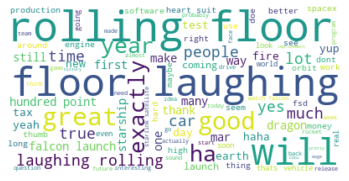

In [ ]:
text = " ".join(review for review in ceo_tweets1.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Amazon

In [ ]:
# amazon word cloud
ceo_tweets2 = ceo_tweets0.loc[(ceo_tweets['username'] == '@ajassy')]
ceo_tweets2

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
945,@ajassy,1490693657397456902,2022-02-07 14:27:18,Looking forward to the Super Bowl on Sunday…he...,104,682,looking forward super bowl sundayheres first l...,"['looking', 'forward', 'super', 'bowl', 'sunda..."
946,@ajassy,1489011224364814338,2022-02-02 23:01:55,Proud of the fact that Amazon has been voted o...,105,708,proud fact ha voted one admired company world ...,"['proud', 'fact', 'ha', 'voted', 'one', 'admir..."
947,@ajassy,1486398825799434240,2022-01-26 18:01:10,Our employees are now eligible for fully-funde...,97,951,employee eligible fullyfunded college tuition ...,"['employee', 'eligible', 'fullyfunded', 'colle..."
948,@ajassy,1484182424825188359,2022-01-20 15:13:59,Very excited to share this with customers…we'r...,108,693,very excited share customerswere opening style...,"['very', 'excited', 'share', 'customerswere', ..."
949,@ajassy,1483816730191298561,2022-01-19 15:00:51,A lot of people are excited for the upcoming @...,53,458,lot people excited upcoming series including t...,"['lot', 'people', 'excited', 'upcoming', 'seri..."
...,...,...,...,...,...,...,...,...
1311,@ajassy,642415873492279296,2015-09-11 19:14:14,Congrats to my super-talented and creative sis...,0,2,congrats supertalented creative sisterstx snag...,"['congrats', 'supertalented', 'creative', 'sis..."
1312,@ajassy,642326713020518404,2015-09-11 13:19:56,Will Washington state honor parent choice? #Sa...,0,3,will washington state honor parent choice,"['will', 'washington', 'state', 'honor', 'pare..."
1313,@ajassy,640257644574326785,2015-09-05 20:18:12,Am truly horrified by what the WA Supreme Cour...,1,30,truly horrified wa supreme court did charter l...,"['truly', 'horrified', 'wa', 'supreme', 'court..."
1314,@ajassy,590325456202702848,2015-04-21 01:25:31,RT @PSConsortium: Congrats @RainierPrep on fin...,1,0,congrats finding new home,"['congrats', 'finding', 'new', 'home']"


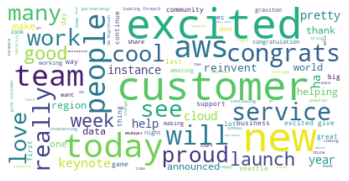

In [ ]:
text = " ".join(review for review in ceo_tweets2.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Apple

In [ ]:
# apple word cloud
ceo_tweets3 = ceo_tweets0.loc[(ceo_tweets['username'] == '@tim_cook')]
ceo_tweets3

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
1316,@tim_cook,1488695509489311744,2022-02-02 02:07:22,Helping customers take steps toward improving ...,276,2415,helping customer take step toward improving he...,"['helping', 'customer', 'take', 'step', 'towar..."
1317,@tim_cook,1488624933890519043,2022-02-01 21:26:56,"This Black History Month, let’s celebrate the ...",321,3500,black history month let celebrate culture cont...,"['black', 'history', 'month', 'let', 'celebrat..."
1318,@tim_cook,1488341436701417474,2022-02-01 02:40:25,Sending wishes of joy to all those celebrating...,539,6278,sending wish joy celebrating lunar new year ma...,"['sending', 'wish', 'joy', 'celebrating', 'lun..."
1319,@tim_cook,1487100529251520512,2022-01-28 16:29:29,We believe privacy is a fundamental human righ...,1047,10130,believe privacy fundamental human right best t...,"['believe', 'privacy', 'fundamental', 'human',..."
1320,@tim_cook,1484279621386264578,2022-01-20 21:40:12,Fitness+ has helped people live a better life ...,280,2624,fitness ha helped people live better life reac...,"['fitness', 'ha', 'helped', 'people', 'live', ..."
...,...,...,...,...,...,...,...,...
2590,@tim_cook,389501293032517632,2013-10-13 21:21:59,Very proud of the Tigers! “@TheAUPlainsman: Au...,279,237,very proud tiger auburn come no week ap top poll,"['very', 'proud', 'tiger', 'auburn', 'come', '..."
2591,@tim_cook,386493665406746625,2013-10-05 14:10:45,Second anniversary of Steve's death. Going on ...,8170,5113,second anniversary steves death going long hik...,"['second', 'anniversary', 'steves', 'death', '..."
2592,@tim_cook,382172377569689600,2013-09-23 15:59:29,Thanks to all our amazing customers for the fa...,2291,1826,thanks amazing customer fantastic weekend,"['thanks', 'amazing', 'customer', 'fantastic',..."
2593,@tim_cook,381751102833582080,2013-09-22 12:05:30,RT @ConanOBrien: iOS7? More like iOSHeaven. #A...,2678,0,io like iosheaven,"['io', 'like', 'iosheaven']"


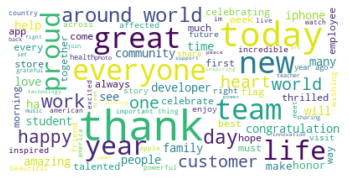

In [ ]:
text = " ".join(review for review in ceo_tweets3.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Microsoft

In [ ]:
# microsoft word cloud
ceo_tweets4 = ceo_tweets0.loc[(ceo_tweets['username'] == '@satyanadella')]
ceo_tweets4

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
2595,@satyanadella,1489763963059392513,2022-02-05 00:53:01,RT @jeffteper: Building the metaverse in the m...,125,0,building metaverse metaverse mesh team team http,"['building', 'metaverse', 'metaverse', 'mesh',..."
2596,@satyanadella,1488562695863296002,2022-02-01 17:19:37,Black History Month is a critical time to reco...,55,370,black history month critical time recognize ce...,"['black', 'history', 'month', 'critical', 'tim..."
2597,@satyanadella,1486833299536314370,2022-01-27 22:47:37,RT @BondSarah_Bond: .@ID_Xbox - Giving creati...,87,0,id_xbox giving creative imaginative independen...,"['id_xbox', 'giving', 'creative', 'imaginative..."
2598,@satyanadella,1486742385547612162,2022-01-27 16:46:21,It’s an honor to receive a Padma Bhushan Award...,6739,89666,honor receive padma bhushan award recognized m...,"['honor', 'receive', 'padma', 'bhushan', 'awar..."
2599,@satyanadella,1486421002795945984,2022-01-26 19:29:18,Thank you to my colleagues across the globe wh...,105,1176,thank colleague across globe continue voluntee...,"['thank', 'colleague', 'across', 'globe', 'con..."
...,...,...,...,...,...,...,...,...
4021,@satyanadella,1460990713,2009-04-06 04:20:11,All About H. Hatterr... quite a read!,5,11,h hatterr quite read,"['h', 'hatterr', 'quite', 'read']"
4022,@satyanadella,1454694394,2009-04-05 01:37:39,great evening to be watching some good old fas...,32,27,great evening watching good old fashioned test...,"['great', 'evening', 'watching', 'good', 'old'..."
4023,@satyanadella,1445457318,2009-04-03 14:13:33,Lots of interest today again on RT streams and...,6,10,lot interest today stream search,"['lot', 'interest', 'today', 'stream', 'search']"
4024,@satyanadella,1436565496,2009-04-02 04:55:24,muking around omuk!,9,14,muking around omuk,"['muking', 'around', 'omuk']"


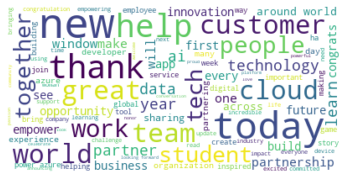

In [ ]:
text = " ".join(review for review in ceo_tweets4.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Google

In [ ]:
# microsoft word cloud
ceo_tweets5 = ceo_tweets0.loc[(ceo_tweets['username'] == '@sundarpichai')]
ceo_tweets5

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
4026,@sundarpichai,1490605806332436480,2022-02-07 08:38:13,Congratulations to President @Macky_Sall on ch...,89,1004,congratulation president chairing honored join...,"['congratulation', 'president', 'chairing', 'h..."
4027,@sundarpichai,1489625175930769409,2022-02-04 15:41:32,"In partnership with @Ford, we're a founding me...",232,2092,partnership founding member michigan central i...,"['partnership', 'founding', 'member', 'michiga..."
4028,@sundarpichai,1489332667354996737,2022-02-03 20:19:13,The placebo effect of a high refresh rate moni...,495,14242,placebo effect high refresh rate monitor amazi...,"['placebo', 'effect', 'high', 'refresh', 'rate..."
4029,@sundarpichai,1488876612787474436,2022-02-02 14:07:01,"Over the last 5 years, Googlers and @Googleorg...",104,1441,last year googlers have given billion nonprofi...,"['last', 'year', 'googlers', 'have', 'given', ..."
4030,@sundarpichai,1488381239321006082,2022-02-01 05:18:34,Happy Year of the Tiger - wishing everyone goo...,318,4200,happy year tiger wishing everyone good health ...,"['happy', 'year', 'tiger', 'wishing', 'everyon..."
...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,happy new year,"['happy', 'new', 'year']"
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying browsing chrome awesome,"['enjoying', 'browsing', 'chrome', 'awesome']"
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering,"['thinking', 'abt', 'twittering']"
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying rainy day beijing clear out pollution,"['enjoying', 'rainy', 'day', 'beijing', 'clear..."


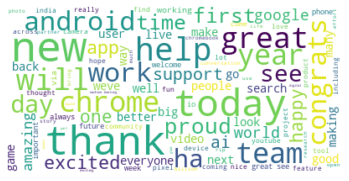

In [ ]:
text = " ".join(review for review in ceo_tweets5.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Predicting sentiments of tweets in ceo_tweets (unsupervised) using tuned SVM

In [ ]:
x = ceo_tweets["tokens"]
x

0                                                                                                                 ['yup']
1             ['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']
2       ['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']
3             ['true', 'careless', 'negativity', 'destruction', 'much', 'harder', 'thoughtful', 'positivity', 'creation']
4                                                                                                       ['sadly', 'true']
                                                              ...                                                        
5683                                                                                             ['happy', 'new', 'year']
5684                                                                        ['enjoying', 'browsing', 'chrome', 'awesome']
5685                    

In [ ]:
x_ceo_tfidf = tfidf_vect.transform(x)
x_ceo_tfidf

<5688x5022 sparse matrix of type '<class 'numpy.float64'>'
	with 31302 stored elements in Compressed Sparse Row format>

In [ ]:
# predict unsupervised ceo tweet dataset  
sentiment_predict = searched_svm_model.predict(x_ceo_tfidf)

In [ ]:
predicted_sentiment = pd.DataFrame(sentiment_predict, columns={"predicted sentiment by SVC"})
predicted_sentiment

,predicted sentiment by SVC
0,0
1,0
2,-1
3,1
4,0
...,...
5683,1
5684,1
5685,0
5686,0


In [ ]:
# concat columns
ceo_tweets_pred_svc = pd.concat([ceo_tweets,predicted_sentiment], axis = 1)
ceo_tweets_pred_svc

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimbal Yup!,188,4193,Yup,['yup'],0
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the question: “What are the worst things happening on Earth today?”\n\nIt’s a big… https://t.co/WJwYccAmth,11029,96629,Most news outlets attempt to answer the question What are the worst things happening on Earth today Its a big,"['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']",0
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going on in the world without being bombarded with news that makes one sad &amp; angry!,828,9829,So hard to find out whats going on in the world without being bombarded with news that makes one sad amp angry,"['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']",-1
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negativity (destruction) is much harder than thoughtful positivity (creation)",420,4962,True careless negativity destruction is much harder than thoughtful positivity creation,"['true', 'careless', 'negativity', 'destruction', 'much', 'harder', 'thoughtful', 'positivity', 'creation']",1
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']",0
...,...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']",1
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesome! http://www.google.com/intl/en/landing/chrome/cadie/",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']",1
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"['thinking', 'abt', 'twittering']",0
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out all pollution!),1,5,enjoying a rainy day in beijing clears out all pollution,"['enjoying', 'rainy', 'day', 'beijing', 'clear', 'out', 'pollution']",0


In [ ]:
#ceo_tweets_pred_svc.to_csv("/content/drive/MyDrive/Data Modelling/Sentiment Analysis/labelled_ceo_tweets_svm.csv", index=False)

# Predicting sentiments of tweets in ceo_tweets (unsupervised) using VADER

NLTK already has a built-in, pretrained sentiment analyzer called VADER 
(Valence Aware Dictionary and Sentiment Reasoner)

## Helper Functions

In [ ]:
# compound score of vader
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)["compound"]
    return sentiment_dict
    # # decide sentiment as positive, negative and neutral
    # if sentiment_dict['compound'] >= 0.05 :
    #     return 1
 
    # elif sentiment_dict['compound'] <= - 0.05 :
    #     return -1
 
    # else :
    #     return 0

### Selecting threshold for positive, negative and neutral sentiments

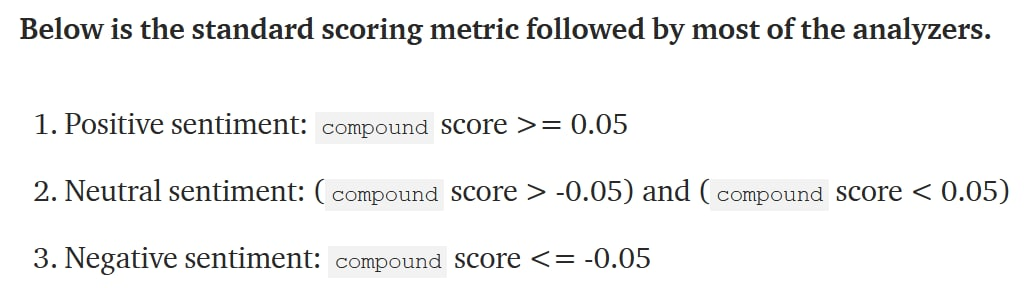

In [ ]:
# categorising the compound scores into positive, negative and neutral sentiments
def label_predicted_sentiment(score):

    # decide sentiment as positive, negative and neutral
    if score >= 0.05 :
        return 1
 
    elif score <= - 0.05 :
        return -1
 
    else :
        return 0



## Sentiment Analysis

In [ ]:
ceo_tweets_pred_svc.head(3)

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimbal Yup!,188,4193,Yup,['yup'],0
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the question: “What are the worst things happening on Earth today?”\n\nIt’s a big… https://t.co/WJwYccAmth,11029,96629,Most news outlets attempt to answer the question What are the worst things happening on Earth today Its a big,"['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']",0
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going on in the world without being bombarded with news that makes one sad &amp; angry!,828,9829,So hard to find out whats going on in the world without being bombarded with news that makes one sad amp angry,"['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']",-1


In [ ]:
ceo_tweets_svc_vader = ceo_tweets_pred_svc.copy()
ceo_tweets_svc_vader['cleaned_tweets'] = ceo_tweets_svc_vader['cleaned_tweets'].astype(str)
ceo_tweets_svc_vader["tweet_score"] = ceo_tweets_svc_vader["cleaned_tweets"].apply(lambda tweet: sentiment_scores(tweet))
ceo_tweets_svc_vader

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimbal Yup!,188,4193,Yup,['yup'],0,0.0000
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the question: “What are the worst things happening on Earth today?”\n\nIt’s a big… https://t.co/WJwYccAmth,11029,96629,Most news outlets attempt to answer the question What are the worst things happening on Earth today Its a big,"['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']",0,-0.6249
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going on in the world without being bombarded with news that makes one sad &amp; angry!,828,9829,So hard to find out whats going on in the world without being bombarded with news that makes one sad amp angry,"['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']",-1,-0.7960
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negativity (destruction) is much harder than thoughtful positivity (creation)",420,4962,True careless negativity destruction is much harder than thoughtful positivity creation,"['true', 'careless', 'negativity', 'destruction', 'much', 'harder', 'thoughtful', 'positivity', 'creation']",1,0.0772
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']",0,0.0000
...,...,...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']",1,0.5719
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesome! http://www.google.com/intl/en/landing/chrome/cadie/",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']",1,0.8176
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"['thinking', 'abt', 'twittering']",0,0.0000
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out all pollution!),1,5,enjoying a rainy day in beijing clears out all pollution,"['enjoying', 'rainy', 'day', 'beijing', 'clear', 'out', 'pollution']",0,0.5267


In [ ]:
ceo_tweets_svc_vader["tweet_score"].sort_values().head(5)

3106   -0.9705
2742   -0.9393
2744   -0.9382
2209   -0.9325
1444   -0.9260
Name: tweet_score, dtype: float64

In [ ]:
ceo_tweets_svc_vader["tweet_score"].sort_values().tail(5)

2490    0.9601
2536    0.9607
1338    0.9682
627     0.9723
1222    0.9726
Name: tweet_score, dtype: float64

In [ ]:
ceo_tweets_svc_vader['predicted sentiment by VADER'] = ceo_tweets_svc_vader['tweet_score'].apply(lambda x: label_predicted_sentiment(x))
ceo_tweets_svc_vader

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimbal Yup!,188,4193,Yup,['yup'],0,0.0000,0
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the question: “What are the worst things happening on Earth today?”\n\nIt’s a big… https://t.co/WJwYccAmth,11029,96629,Most news outlets attempt to answer the question What are the worst things happening on Earth today Its a big,"['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']",0,-0.6249,-1
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going on in the world without being bombarded with news that makes one sad &amp; angry!,828,9829,So hard to find out whats going on in the world without being bombarded with news that makes one sad amp angry,"['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']",-1,-0.7960,-1
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negativity (destruction) is much harder than thoughtful positivity (creation)",420,4962,True careless negativity destruction is much harder than thoughtful positivity creation,"['true', 'careless', 'negativity', 'destruction', 'much', 'harder', 'thoughtful', 'positivity', 'creation']",1,0.0772,1
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']",0,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']",1,0.5719,1
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesome! http://www.google.com/intl/en/landing/chrome/cadie/",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']",1,0.8176,1
5685,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"['thinking', 'abt', 'twittering']",0,0.0000,0
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out all pollution!),1,5,enjoying a rainy day in beijing clears out all pollution,"['enjoying', 'rainy', 'day', 'beijing', 'clear', 'out', 'pollution']",0,0.5267,1


In [ ]:
ceo_tweets_svc_vader["predicted sentiment by VADER"].value_counts()

 1    3895
 0    1353
-1     440
Name: predicted sentiment by VADER, dtype: int64

In [ ]:
ceo_tweets_svc_vader["predicted sentiment by SVC"].value_counts()

 0    3828
 1    1704
-1     156
Name: predicted sentiment by SVC, dtype: int64

In [ ]:
ceo_tweets_svc_vader.to_csv("/content/drive/MyDrive/Data Modelling/Sentiment Analysis/labelled_ceo_tweets_svm_vader.csv", index=False)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
# same predicted sentiments
ceo_tweets_svc_vader[ceo_tweets_svc_vader["predicted sentiment by VADER"] == ceo_tweets_svc_vader["predicted sentiment by SVC"]]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimbal Yup!,188,4193,Yup,['yup'],0,0.0000,0
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going on in the world without being bombarded with news that makes one sad &amp; angry!,828,9829,So hard to find out whats going on in the world without being bombarded with news that makes one sad amp angry,"['hard', 'find', 'out', 'whats', 'going', 'world', 'without', 'bombarded', 'news', 'make', 'one', 'sad', 'angry']",-1,-0.7960,-1
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negativity (destruction) is much harder than thoughtful positivity (creation)",420,4962,True careless negativity destruction is much harder than thoughtful positivity creation,"['true', 'careless', 'negativity', 'destruction', 'much', 'harder', 'thoughtful', 'positivity', 'creation']",1,0.0772,1
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"['sadly', 'true']",0,0.0000,0
5,@elonmusk,1490830733270679553,2022-02-07 23:31:59,"@JohnnaCrider1 That’s true to some degree, but citizen podcasts that aren’t negative like Rogan, Fridman, Dodd, TED… https://t.co/FPDvJfsOTF",1289,17425,Thats true to some degree but citizen podcasts that arent negative like Rogan Fridman Dodd TED,"['thats', 'true', 'degree', 'but', 'citizen', 'podcasts', 'arent', 'negative', 'like', 'rogan', 'fridman', 'dodd', 'ted']",1,0.4993,1
...,...,...,...,...,...,...,...,...,...,...,...
5680,@sundarpichai,1856791477,2009-05-20 06:32:32,Our ancestor http://www.cnn.com/2009/TECH/science/05/19/human.ancestor/index.html,0,2,Our ancestor,['ancestor'],0,0.0000,0
5682,@sundarpichai,1653976734,2009-04-29 23:42:25,What is Google Chrome?\nhttp://tinyurl.com/d7jldu,0,4,What is Google Chrome,['chrome'],0,0.0000,0
5683,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"['happy', 'new', 'year']",1,0.5719,1
5684,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesome! http://www.google.com/intl/en/landing/chrome/cadie/",0,2,enjoying d browsing with Chrome it is awesome,"['enjoying', 'browsing', 'chrome', 'awesome']",1,0.8176,1


In [ ]:
# different predicted sentiments
# 3124 different records
ceo_tweets_svc_vader[ceo_tweets_svc_vader["predicted sentiment by VADER"] != ceo_tweets_svc_vader["predicted sentiment by SVC"]]

In [ ]:
# vader predict more positive sentiment 
ceo_tweets_svc_vader[ceo_tweets_svc_vader["predicted sentiment by VADER"] > ceo_tweets_svc_vader["predicted sentiment by SVC"]]

In [ ]:
# vader predict less positive sentiment 
ceo_tweets_svc_vader[ceo_tweets_svc_vader["predicted sentiment by VADER"] < ceo_tweets_svc_vader["predicted sentiment by SVC"]]

In [ ]:
different_prediction = ceo_tweets_svc_vader[ceo_tweets_svc_vader["predicted sentiment by VADER"] != ceo_tweets_svc_vader["predicted sentiment by SVC"]]

In [ ]:
# vader is more accurate
different_prediction[different_prediction["predicted sentiment by VADER"] == 0]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
30,@elonmusk,1489841690601041924,2022-02-05 06:01:53,@Ali_Tesla585 @teslaownersSV @TheRealKeean Only very high resolution radar is relevant,149,2479,Only very high resolution radar is relevant,"['very', 'high', 'resolution', 'radar', 'relevant']",-1,0.0,0
63,@elonmusk,1488615123946246151,2022-02-01 20:47:57,"@WholeMarsBlog @tkrisher He’s actually a lobbyist, not a journalist. There are many who pose as the latter while be… https://t.co/ITvIB8bVjA",549,5273,Hes actually a lobbyist not a journalist There are many who pose as the latter while be,"['he', 'actually', 'lobbyist', 'not', 'journalist', 'many', 'pose', 'latter', 'while']",-1,0.0,0
66,@elonmusk,1488437071761055745,2022-02-01 09:00:26,@Erdayastronaut Will upload some videos tomorrow,722,21514,Will upload some videos tomorrow,"['will', 'upload', 'video', 'tomorrow']",1,0.0,0
86,@elonmusk,1487861173626101760,2022-01-30 18:52:01,So many Hitlers! https://t.co/52sUuPcB93,32057,253364,So many Hitlers,"['many', 'hitler']",1,0.0,0
106,@elonmusk,1487118125732671497,2022-01-28 17:39:25,@archillect I have one,1088,38160,I have one,"['have', 'one']",1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5635,@sundarpichai,12780073023,2010-04-24 19:40:24,I subscribed to sbrin1600's channel on YouTube http://www.youtube.com/user/sbrin1600?feature=autoshare_twitter,0,3,I subscribed to sbrins channel on YouTube,"['subscribed', 'sbrins', 'channel', 'youtube']",1,0.0,0
5643,@sundarpichai,8133865898,2010-01-24 02:40:42,@peterchane simon singh fermat's last theorem - just reading it,0,2,simon singh fermats last theorem just reading it,"['simon', 'singh', 'fermat', 'last', 'theorem', 'just', 'reading']",-1,0.0,0
5652,@sundarpichai,5224106295,2009-10-28 06:27:34,Life is random http://www.cnn.com/2009/CRIME/10/27/nevada.car.crash.home/index.html,0,2,Life is random,"['life', 'random']",1,0.0,0
5675,@sundarpichai,2291247866,2009-06-23 06:30:02,"finally caved in and got my kindle, it is here - only one more device to carry with me!",0,3,finally caved in and got my kindle it is here only one more device to carry with me,"['finally', 'caved', 'got', 'kindle', 'one', 'device', 'carry']",1,0.0,0


In [ ]:
# vader is more accurate
different_prediction[different_prediction["predicted sentiment by SVC"] == 0]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the question: “What are the worst things happening on Earth today?”\n\nIt’s a big… https://t.co/WJwYccAmth,11029,96629,Most news outlets attempt to answer the question What are the worst things happening on Earth today Its a big,"['news', 'outlet', 'attempt', 'answer', 'question', 'worst', 'thing', 'happening', 'earth', 'today', 'big']",0,-0.6249,-1
6,@elonmusk,1490828521584971777,2022-02-07 23:23:12,@greg16676935420 🤣👍,357,11489,rolling on the floor laughing thumbs up,"['rolling', 'floor', 'laughing', 'thumb']",0,0.4939,1
8,@elonmusk,1490827367753056257,2022-02-07 23:18:37,Why is the “traditional” media such a relentless hatestream? Real question.,27865,211835,Why is the traditional media such a relentless hatestream Real question,"['traditional', 'medium', 'relentless', 'hatestream', 'real', 'question']",0,0.0516,1
9,@elonmusk,1490826723356782596,2022-02-07 23:16:03,@TheBabylonBee Fate ♥️ Irony,774,10228,Fate heart suit Irony,"['fate', 'heart', 'suit', 'irony']",0,-0.0516,-1
10,@elonmusk,1490765429199052803,2022-02-07 19:12:30,@wintonARK It was so crazy! The insane tweet FUD campaign &amp; press hatestream of 2017-2019 is still easily found.,351,4633,It was so crazy The insane tweet FUD campaign amp press hatestream of is still easily found,"['crazy', 'insane', 'tweet', 'fud', 'campaign', 'press', 'hatestream', 'still', 'easily', 'found']",0,-0.7589,-1
...,...,...,...,...,...,...,...,...,...,...,...
5676,@sundarpichai,2203750235,2009-06-17 07:26:54,"Wireless charging of cell phone, sweet. http://tech.yahoo.com/blogs/null/143945",0,2,Wireless charging of cell phone sweet,"['wireless', 'charging', 'cell', 'phone', 'sweet']",0,0.4588,1
5678,@sundarpichai,2047976403,2009-06-05 21:28:14,"For brave users - Chrome for Mac, Linux http://bit.ly/uh5GL",0,2,For brave users Chrome for Mac Linux,"['brave', 'user', 'chrome', 'mac', 'linux']",0,0.5267,1
5681,@sundarpichai,1703825619,2009-05-05 06:06:40,was abt to buy Kindle when they launched v2. now was getting ready to order and they have the larger screen kindle. should i wait,0,2,was abt to buy Kindle when they launched v now was getting ready to order and they have the larger screen kindle should i wait,"['abt', 'buy', 'kindle', 'launched', 'v', 'getting', 'ready', 'order', 'have', 'larger', 'screen', 'kindle', 'should', 'wait']",0,0.4588,1
5686,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out all pollution!),1,5,enjoying a rainy day in beijing clears out all pollution,"['enjoying', 'rainy', 'day', 'beijing', 'clear', 'out', 'pollution']",0,0.5267,1


In [ ]:
different_prediction[different_prediction["predicted sentiment by VADER"] == 1][20:30]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
95,@elonmusk,1487435878591078400,2022-01-29 14:42:03,@jordanbpeterson Voters should call their elected politicians now to make it clear how they feel,2506,17952,Voters should call their elected politicians now to make it clear how they feel,"['voter', 'should', 'call', 'elected', 'politician', 'make', 'clear', 'feel']",0,0.3818,1
101,@elonmusk,1487168671269203968,2022-01-28 21:00:16,@DineshDSouza Interesting ideas,4941,70577,Interesting ideas,"['interesting', 'idea']",0,0.4019,1
103,@elonmusk,1487144923593949186,2022-01-28 19:25:54,@Tesmanian_com Excited for future of solar at Tesla!,769,13734,Excited for future of solar at Tesla,"['excited', 'future', 'solar']",0,0.3400,1
104,@elonmusk,1487121182155550725,2022-01-28 17:51:33,@stevenmarkryan Tesla will support FSD licensing by other manufacturers,722,6768,Tesla will support FSD licensing by other manufacturers,"['will', 'support', 'fsd', 'licensing', 'manufacturer']",0,0.4019,1
105,@elonmusk,1487119404382961664,2022-01-28 17:44:30,"Disney in the streets,\nEuphoria in the sheets\n\nhttps://t.co/BPf9Bh23mv",4929,46648,Disney in the streets Euphoria in the sheets,"['disney', 'street', 'euphoria', 'sheet']",0,0.6486,1
107,@elonmusk,1486880325871587329,2022-01-28 01:54:29,"@stevenmarkryan Given how hard insanely FSD is, I think it may take 5 years or more before any company besides Tesla solves it",978,9721,Given how hard insanely FSD is I think it may take years or more before any company besides Tesla solves it,"['given', 'hard', 'insanely', 'fsd', 'think', 'may', 'take', 'year', 'company', 'besides', 'solves']",0,0.1779,1
110,@elonmusk,1486848098387345408,2022-01-27 23:46:25,"@guper777 Honestly, I would let the border regions vote. Let the people there actually decide.",328,4964,Honestly I would let the border regions vote Let the people there actually decide,"['honestly', 'would', 'let', 'border', 'region', 'vote', 'let', 'people', 'actually', 'decide']",0,0.4588,1
112,@elonmusk,1486846468887560201,2022-01-27 23:39:57,"If you scare people enough, they will demand removal of freedom. This is the path to tyranny.",129305,565922,If you scare people enough they will demand removal of freedom This is the path to tyranny,"['scare', 'people', 'enough', 'will', 'demand', 'removal', 'freedom', 'path', 'tyranny']",0,0.1280,1
113,@elonmusk,1486827458632503297,2022-01-27 22:24:24,Seems odd that the UN still hasn’t released 2020 world death rates,36902,276095,Seems odd that the UN still hasnt released world death rates,"['seems', 'odd', 'un', 'still', 'hasnt', 'released', 'world', 'death', 'rate']",0,0.2134,1
120,@elonmusk,1486806256027422730,2022-01-27 21:00:09,CB radios are free from govt/media control,12938,119964,CB radios are free from govtmedia control,"['cb', 'radio', 'free', 'govtmedia', 'control']",0,0.5106,1


In [ ]:
different_prediction[different_prediction["predicted sentiment by SVC"] == 1][20:30]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
333,@elonmusk,1473167043105103876,2021-12-21 05:42:47,@jack m something something,839,17071,m something something,"['something', 'something']",1,0.00,0
337,@elonmusk,1472973709141065730,2021-12-20 16:54:33,@pbdes @JeanMarc_Nasr @esa @SpaceX Game on,1228,17052,Game on,['game'],1,0.00,0
341,@elonmusk,1472755031296335873,2021-12-20 02:25:36,@imoriginalankit Maybe I’m partly Chinese!,492,9096,Maybe Im partly Chinese,"['maybe', 'im', 'partly', 'chinese']",1,0.00,0
365,@elonmusk,1472066982212251650,2021-12-18 04:51:32,@F9Block5 Coming,90,2425,Coming,['coming'],1,0.00,0
370,@elonmusk,1472060261309759488,2021-12-18 04:24:50,@johnkrausphotos @NASASpaceflight The ship is just begging for three more vacuum engines to be added. Tanks will st… https://t.co/daKOJe2Jof,172,3170,The ship is just begging for three more vacuum engines to be added Tanks will,"['ship', 'just', 'begging', 'three', 'vacuum', 'engine', 'added', 'tank', 'will']",1,0.00,0
378,@elonmusk,1471803138273386498,2021-12-17 11:23:07,"@EvaFoxU @cnunezimages Still much to be done, but it has that potential",425,11429,Still much to be done but it has that potential,"['still', 'much', 'done', 'but', 'ha', 'potential']",1,0.00,0
386,@elonmusk,1471618177486438405,2021-12-16 23:08:09,"@William_Blake @peterthiel @mlevchin @DavidSacks @reidhoffman I haven’t read the book, but Soni’s questions were in… https://t.co/DyfDUIYqh7",201,4797,I havent read the book but Sonis questions were in,"['havent', 'read', 'book', 'but', 'sonis', 'question']",1,0.00,0
416,@elonmusk,1470899663087747072,2021-12-14 23:33:02,@SenWarren Don’t spend it all at once … oh wait you did already,11208,119747,Dont spend it all at once oh wait you did already,"['dont', 'spend', 'oh', 'wait', 'did', 'already']",1,0.00,0
422,@elonmusk,1470855186734276610,2021-12-14 20:36:18,@SenWarren You remind me of when I was a kid and my friend’s angry Mom would just randomly yell at everyone for no reason,11528,129436,You remind me of when I was a kid and my friends angry Mom would just randomly yell at everyone for no reason,"['remind', 'kid', 'friend', 'angry', 'mom', 'would', 'just', 'randomly', 'yell', 'everyone', 'no', 'reason']",1,-0.34,-1
428,@elonmusk,1470786109965848577,2021-12-14 16:01:49,@Austen That is how I feel about myself! Oh wait …,868,34174,That is how I feel about myself Oh wait,"['feel', 'oh', 'wait']",1,0.00,0


In [ ]:
different_prediction[different_prediction["predicted sentiment by VADER"] == -1][100:110]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
833,@elonmusk,1457083243933601802,2021-11-06 20:31:31,@Rainmaker1973 Tesla Autopilot spends a lot of effort on minimizing jerk,327,7685,Tesla Autopilot spends a lot of effort on minimizing jerk,"['autopilot', 'spends', 'lot', 'effort', 'minimizing', 'jerk']",1,-0.3400,-1
834,@elonmusk,1457076751360724995,2021-11-06 20:05:43,Roll them 🎲 🎲 https://t.co/F2rXGcz964,3827,49201,Roll them game die game die,"['roll', 'game', 'die', 'game', 'die']",1,-0.8316,-1
875,@elonmusk,1455205253897506822,2021-11-01 16:09:03,@RenataKonkoly @Forbes Both of those factories failed &amp; shut down long ago. Strange thing to brag about.,426,6603,Both of those factories failed amp shut down long ago Strange thing to brag about,"['factory', 'failed', 'shut', 'long', 'ago', 'strange', 'thing', 'brag']",0,-0.6249,-1
893,@elonmusk,1454808104256737289,2021-10-31 13:50:55,"@DrEliDavid If WFP can describe on this Twitter thread exactly how $6B will solve world hunger, I will sell Tesla stock right now and do it.",59360,334145,If WFP can describe on this Twitter thread exactly how B will solve world hunger I will sell Tesla stock right now and do it,"['wfp', 'can', 'describe', 'twitter', 'thread', 'exactly', 'b', 'will', 'solve', 'world', 'hunger', 'will', 'sell', 'stock', 'right', 'do']",1,-0.0516,-1
895,@elonmusk,1454610032679600129,2021-10-31 00:43:51,"@hsumacher @Tesla Indeed. The factory was empty at the time, stripped of all equipment that wasn’t worth even its s… https://t.co/HTn2bmxPWF",820,22814,Indeed The factory was empty at the time stripped of all equipment that wasnt worth even its s,"['indeed', 'factory', 'empty', 'time', 'stripped', 'equipment', 'wasnt', 'worth', 'even']",0,-0.3540,-1
927,@elonmusk,1453479688832180228,2021-10-27 21:52:16,"@wapodavenport US national debt is ~$28,900 billion or ~$229k per taxpayer.\n\nEven taxing all “billionaires” at 100%… https://t.co/VupuSWWLHP",7123,34599,US national debt is billion or k per taxpayer Even taxing all billionaires at,"['u', 'national', 'debt', 'billion', 'k', 'per', 'taxpayer', 'even', 'taxing', 'billionaire']",0,-0.3612,-1
928,@elonmusk,1453476798029869056,2021-10-27 21:40:47,@tesla_raj 👻,231,5170,ghost,['ghost'],0,-0.3182,-1
941,@elonmusk,1452976991196655619,2021-10-26 12:34:44,"@PPathole @Tesla Reducing traffic fatalities by 90% seems likely, perhaps ultimately by over 99%",449,5817,Reducing traffic fatalities by seems likely perhaps ultimately by over,"['reducing', 'traffic', 'fatality', 'seems', 'likely', 'perhaps', 'ultimately']",0,-0.5994,-1
954,@ajassy,1469735669442711552,2021-12-11 18:27:44,"We've been closely monitoring the terrible situation in Edwardsville, and are heartbroken over the loss of our team… https://t.co/Hew4GSkoAC",64,483,Weve been closely monitoring the terrible situation in Edwardsville and are heartbroken over the loss of our team,"['weve', 'closely', 'monitoring', 'terrible', 'situation', 'edwardsville', 'heartbroken', 'loss', 'team']",0,-0.8658,-1
955,@ajassy,1468641167306682369,2021-12-08 17:58:34,Addressing the affordable housing crisis in underrepresented communities starts with removing barriers. Amazon’s ne… https://t.co/3BlRd7QTzU,51,242,Addressing the affordable housing crisis in underrepresented communities starts with removing barriers Amazons ne,"['addressing', 'affordable', 'housing', 'crisis', 'underrepresented', 'community', 'start', 'removing', 'barrier', 'amazon', 'ne']",0,-0.6369,-1


In [ ]:
#vader better
different_prediction[different_prediction["predicted sentiment by SVC"] == -1][100:110]

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens,predicted sentiment by SVC,tweet_score,predicted sentiment by VADER
4725,@sundarpichai,904599312193040386,2017-09-04 06:57:37,@iamsrk @TedTalksIndia 🙏 Always fun talking to you @iamsrk - next time let's do it in person!:),999,2788,folded hands Always fun talking to you next time lets do it in person,"['folded', 'hand', 'always', 'fun', 'talking', 'next', 'time', 'let', 'do', 'person']",-1,0.5106,1
4728,@sundarpichai,902617889261273088,2017-08-29 19:44:09,Our thoughts are with the victims of #HurricaneHarvey - please help support the relief effort if you can https://t.co/jBvfpOtmAh,147,793,Our thoughts are with the victims of please help support the relief effort if you can,"['thought', 'victim', 'please', 'help', 'support', 'relief', 'effort', 'can']",-1,0.8176,1
4957,@sundarpichai,716113954917879808,2016-04-02 04:04:06,Love @StephenCurry30 @warriors but even more after this - looking forward to El Classico tomorrow #FCBarcelona https://t.co/n7ZOdv3uNA,75,293,Love but even more after this looking forward to El Classico tomorrow,"['love', 'but', 'even', 'looking', 'forward', 'el', 'classico', 'tomorrow']",-1,0.3818,1
4970,@sundarpichai,707621349020160000,2016-03-09 17:37:31,"Like #AlphaGo’s big win, AI will help us tackle complex challenges we previously thought impossible.https://t.co/ykXVJfFMYj",346,490,Like s big win AI will help us tackle complex challenges we previously thought impossible,"['like', 'big', 'win', 'ai', 'will', 'help', 'u', 'tackle', 'complex', 'challenge', 'previously', 'thought', 'impossible']",-1,0.8519,1
4976,@sundarpichai,705510712370601984,2016-03-03 21:50:36,Proud to have Google engineers working w/ @UNICEF to help analyze &amp; map Zika virus response https://t.co/owq3AISLtz,160,408,Proud to have Google engineers working w to help analyze amp map Zika virus response,"['proud', 'have', 'engineer', 'working', 'w', 'help', 'analyze', 'map', 'zika', 'virus', 'response']",-1,0.7003,1
5013,@sundarpichai,675849616877727744,2015-12-13 01:27:59,RT @FiveThirtyEight: It's time to take the Warriors' chances of going 73-9 seriously https://t.co/2EMvzHMFkj https://t.co/pf2BLRvKNY,81,0,RT Its time to take the Warriors chances of going seriously,"['time', 'take', 'warrior', 'chance', 'going', 'seriously']",-1,0.0258,0
5016,@sundarpichai,675529876741316608,2015-12-12 04:17:28,@anildash that did make me laugh. Am sure many are thankful that I am not a doctor:),6,77,that did make me laugh Am sure many are thankful that I am not a doctor,"['did', 'make', 'laugh', 'sure', 'many', 'thankful', 'not', 'doctor']",-1,0.8625,1
5032,@sundarpichai,665383533439946755,2015-11-14 04:19:31,My thoughts are with all the victims and their families on this sad night #Paris Great to see everyone come together to support France,230,522,My thoughts are with all the victims and their families on this sad night Great to see everyone come together to support France,"['thought', 'victim', 'family', 'sad', 'night', 'great', 'see', 'everyone', 'come', 'together', 'support', 'france']",-1,0.2204,1
5042,@sundarpichai,659958085075644416,2015-10-30 05:00:43,RT @lockheimer: There’s a ton of momentum for Chromebooks and we are very committed to Chrome OS. I just bought two for my kids for schoolw…,181,0,RT Theres a ton of momentum for Chromebooks and we are very committed to Chrome OS I just bought two for my kids for schoolw,"['there', 'ton', 'momentum', 'chromebooks', 'very', 'committed', 'chrome', 'o', 'just', 'bought', 'two', 'kid', 'schoolw']",-1,0.3384,1
5072,@sundarpichai,648901323958546432,2015-09-29 16:45:06,"RT @mhbergen: Since Google photos has launched, people have uploaded 50 billion photos, which, good god.",94,0,RT Since Google photos has launched people have uploaded billion photos which good god,"['since', 'photo', 'ha', 'launched', 'people', 'have', 'uploaded', 'billion', 'photo', 'good', 'god']",-1,0.6705,1
